
# INE PREVISIONES  


### Llibreries i càrrega de dades

In [28]:
"""Libreries que poden ser necessàries"""

# Manejo de datos
import pandas as pd                 # Análisis y manipulación de datos en tablas
import numpy as np                  # Cálculos numéricos y matrices
import os                           # Gestión de rutas de archivos

# Visualización de datos
import matplotlib.pyplot as plt     # Gráficos básicos en 2D
import seaborn as sns               # Gráficos estadísticos mejorados
import plotly.express as px         # Gráficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gráficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualización de diagramas de "treemap"
from plottable import Table         # Visualización de tablas
import matplotlib.colors as mcolors # Colores y mapas de colores

# Clustering y agrupamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes


In [17]:
# %pip install plottable
# %pip install kmodes


In [32]:
# Load the CSV files
men_df = pd.read_csv("../Data/INE/INE hombres - Hombres.csv", index_col=0)



In [33]:
women_df = pd.read_csv("../Data/INE/INE mujeres - Mujeres.csv", index_col=0)

Paleta de colors

In [34]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

# Anàlisi 

### Piràmide poblacional 2025

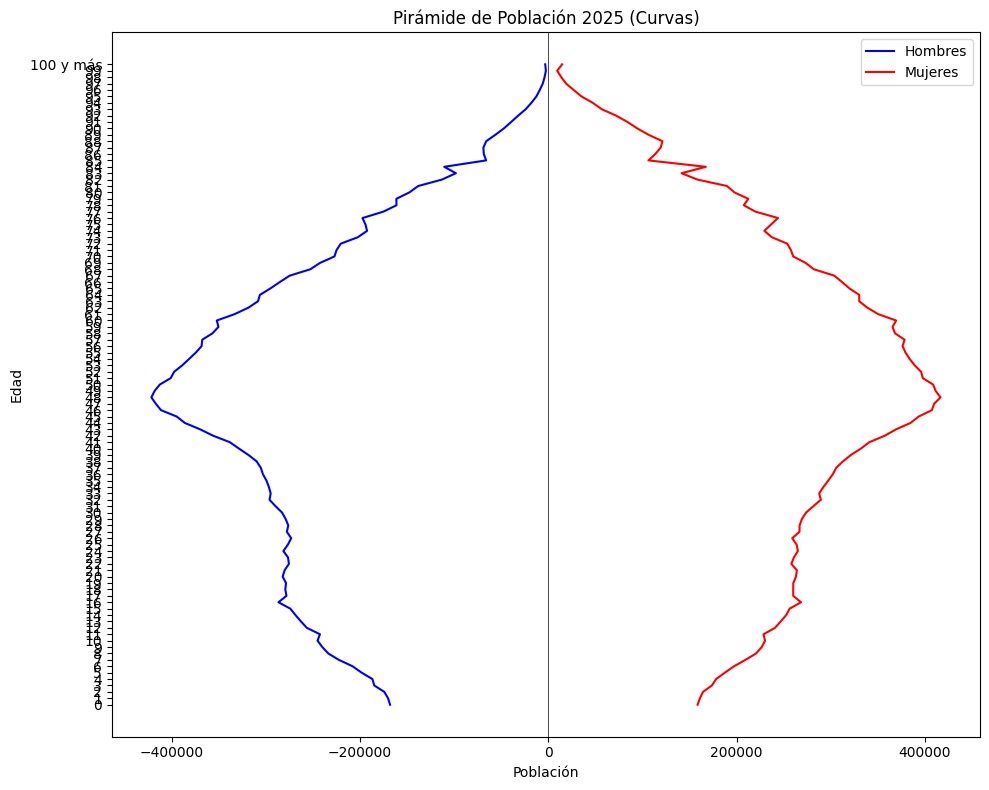

In [42]:

# Extract 2025 data
men_2025 = men_df['2025']
women_2025 = women_df['2025']

# Age groups as they are (youngest to oldest)
ages = men_2025.index
men_values = -men_2025.values  # Negative for left side
women_values = women_2025.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2030


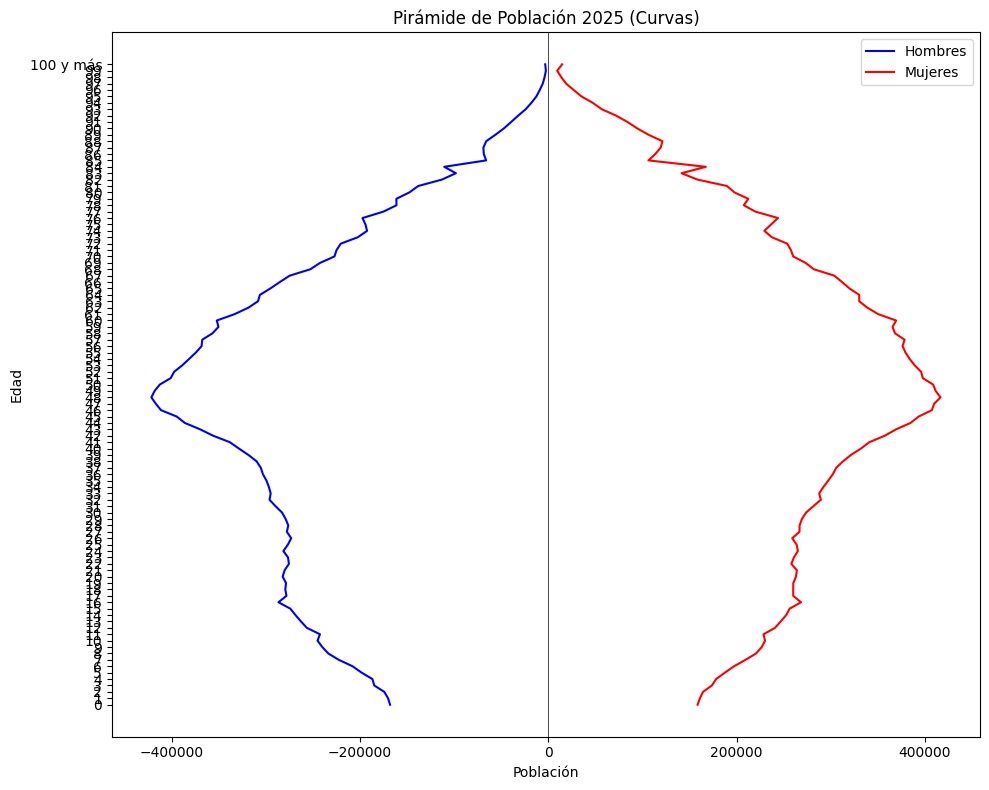

In [43]:
# Extract 2030 data
men_2030 = men_df['2030']
women_2030 = women_df['2030']

# Age groups as they are (youngest to oldest)
ages = men_2030.index
men_values = -men_2030.values  # Negative for left side
women_values = women_2030.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


### Piràmide poblacional 2035


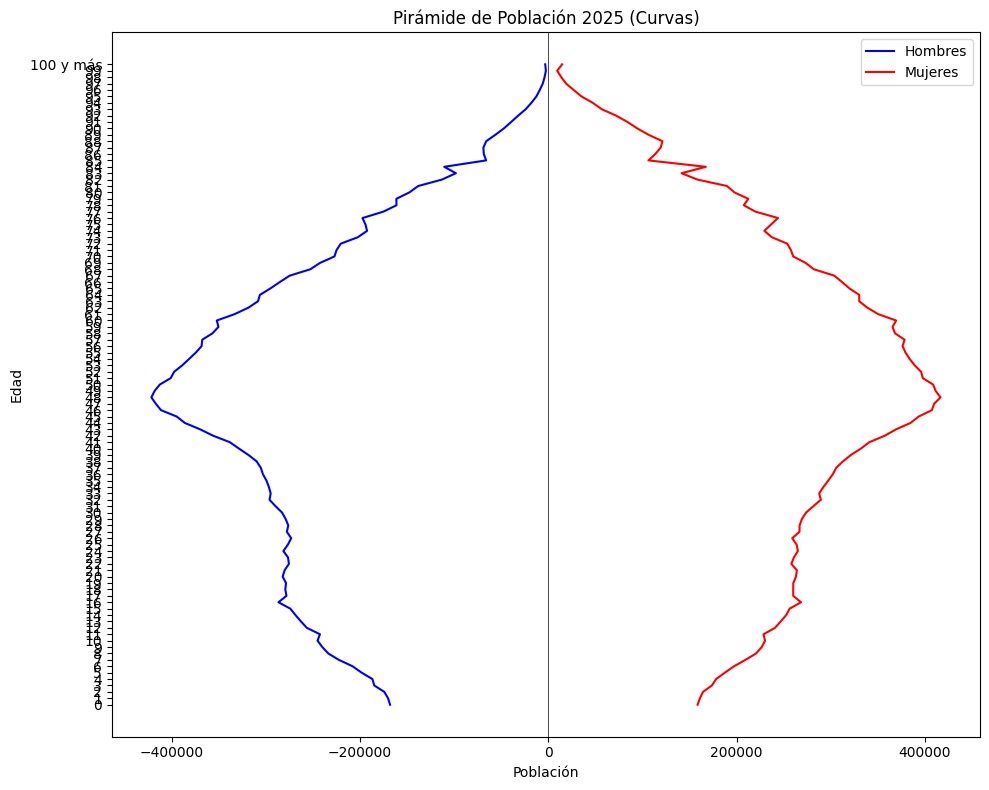

In [44]:
# Extract 2035 data
men_2035 = men_df['2035']
women_2035 = women_df['2035']

# Age groups as they are (youngest to oldest)
ages = men_2035.index
men_values = -men_2035.values  # Negative for left side
women_values = women_2035.values

# Plotting
plt.figure(figsize=(10, 8))

plt.plot(-men_2025.values, ages, color='blue', label='Hombres')   # Negative for left side
plt.plot(women_2025.values, ages, color='red', label='Mujeres')   # Positive for right side

plt.axvline(0, color='black', linewidth=0.5)  # Center line
plt.xlabel('Población')
plt.ylabel('Edad')
plt.title('Pirámide de Población 2025 (Curvas)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Piràmide poblacional conjunta
